In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Salary Prediction of Data Professions.csv')
data

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


1. Exploratory Data Analysis

In [9]:
data.shape

(2639, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [11]:
data.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [12]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [13]:
data.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [14]:
#check the missing values in the data
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [15]:
#Replacing null values to zero
data.fillna(0,inplace=True)
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,0,F,0,01-07-2016,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


In [16]:
#Unique values in the dataset
data.nunique()

FIRST NAME          2367
LAST NAME           2476
SEX                    2
DOJ                  968
CURRENT DATE           1
DESIGNATION            6
AGE                   26
SALARY              2305
UNIT                   6
LEAVES USED           17
LEAVES REMAINING      16
RATINGS                5
PAST EXP              21
dtype: int64

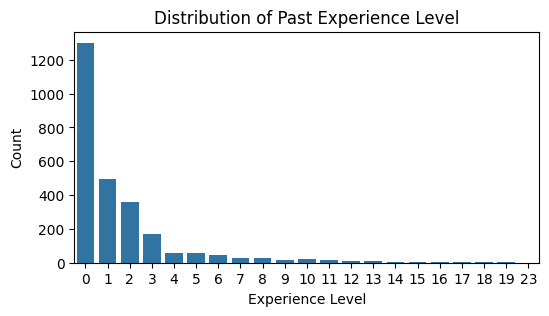

In [17]:
#Distribution of Past Experience
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='PAST EXP')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Past Experience Level')
plt.show()

In [18]:
#Converting date string into year format
import datetime
from datetime import datetime
data['DOJ'] = pd.DatetimeIndex(data['DOJ']).year
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,0,F,1970,01-07-2016,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,OLIVE,ANCY,F,2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014,01-07-2016,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


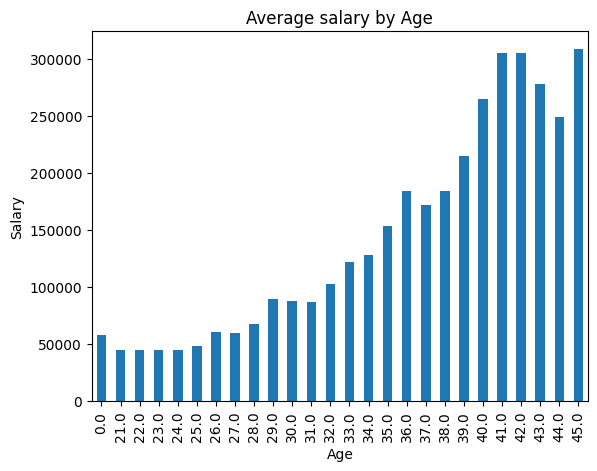

In [19]:
#Distribution of Avg Salary by Age
d1 = data.groupby("AGE")["SALARY"].mean()
d1.plot(kind="bar")
plt.title("Average salary by Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

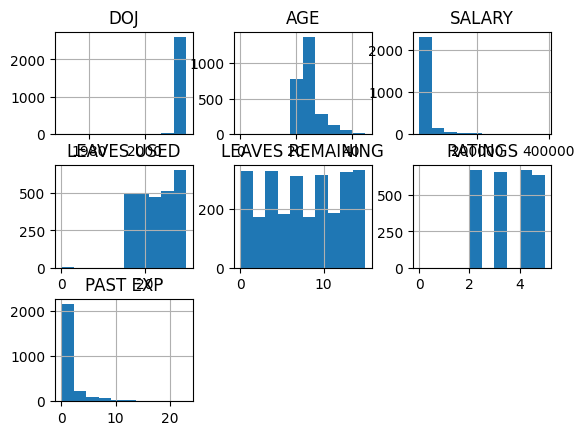

In [20]:
data.hist()
plt.show()

DESIGNATION
Director          286971.19
Senior Manager    178664.27
Manager           126272.59
Associate          87202.98
Senior Analyst     59901.35
Analyst            45020.11
Name: SALARY, dtype: float64


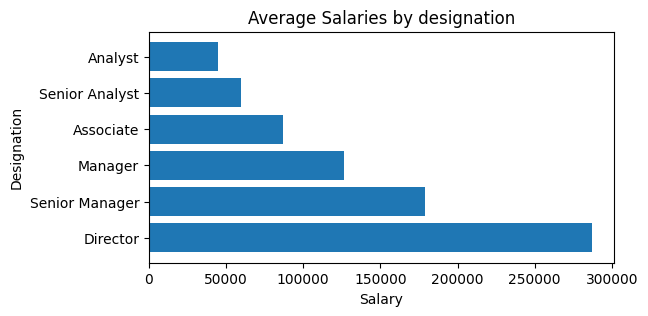

In [21]:
#To find Avg salary per Designation
desg_salaries = data.groupby('DESIGNATION')['SALARY'].mean().sort_values(ascending=False)
print(round(desg_salaries,2))

#Create horizontal bar chart
fig, ax = plt.subplots(figsize=(6,3))
ax.barh(desg_salaries.index, desg_salaries.values)
ax.set_title('Average Salaries by designation')
ax.set_xlabel('Salary')
ax.set_ylabel('Designation')
plt.show()

PAST EXP
0    1301
1     494
2     362
3     168
5      56
Name: count, dtype: int64


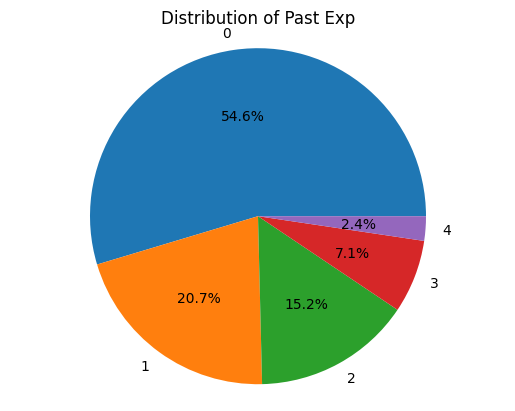

In [22]:
#Distribution of pie-chart for 0-5 work Exp
w = data["PAST EXP"].value_counts().head(5)
print(w)
plt.pie(w, labels=['0','1','2','3','4'],autopct='%1.1f%%')
plt.title('Distribution of Past Exp')
plt.axis('equal')
plt.show()

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64


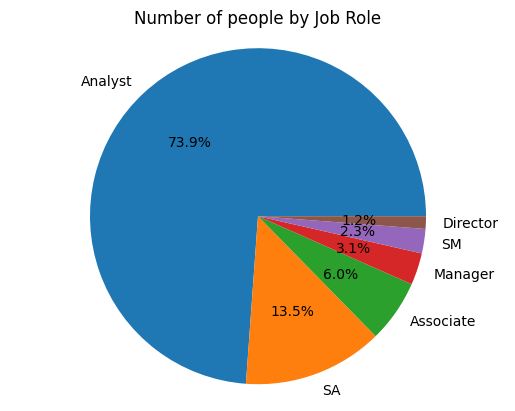

In [23]:
#Distribution of pie-chart w.r.t Job Roles
print(data["DESIGNATION"].value_counts())
roles=["Analyst","SA","Associate","Manager","SM","Director"]
people=[1949,356,159,81,62,32]
plt.pie(people, labels=roles, autopct='%1.1f%%')
plt.title('Number of people by Job Role')
plt.axis('equal')
plt.show()

UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64


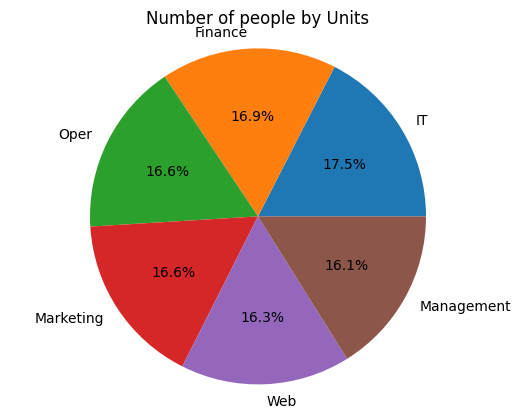

In [24]:
#Distribution of pie-chart w.r.t units
print(data["UNIT"].value_counts())
units=['IT','Finance','Oper','Marketing','Web','Management']
people=[461,446,438,438,431,425]
plt.pie(people, labels=units, autopct='%1.1f%%')
plt.title('Number of people by Units')
plt.axis('equal')
plt.show()

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: RATINGS, dtype: int64


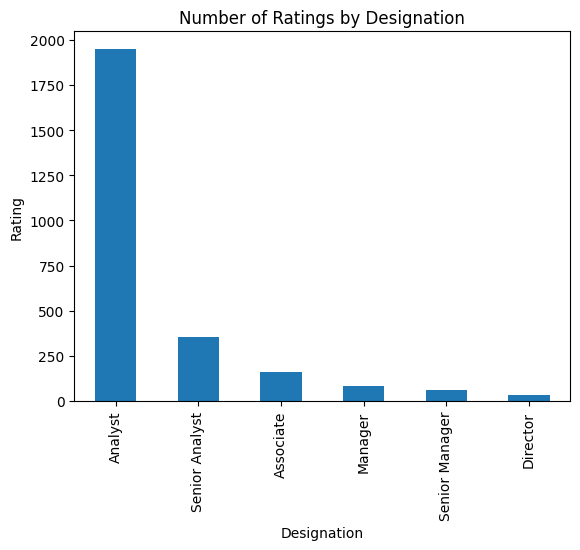

In [25]:
#Distribution of Number of Ratings by Designation
d1 = data.groupby("DESIGNATION")["RATINGS"].count().sort_values(ascending=False)
print(d1)
d1.plot(kind="bar")
plt.title("Number of Ratings by Designation")
plt.xlabel("Designation")
plt.ylabel("Rating")
plt.show()

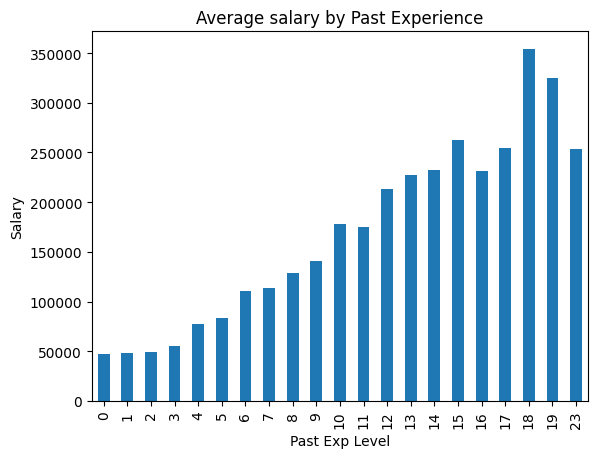

In [26]:
#Distribution of Avg salary by Past Exp
d1 = data.groupby("PAST EXP")["SALARY"].mean()
d1.plot(kind="bar")
plt.title("Average salary by Past Experience")
plt.xlabel("Past Exp Level")
plt.ylabel("Salary")
plt.show()

UNIT
Marketing     59318.05
Management    59186.94
IT            58998.11
Finance       58599.10
Web           57202.51
Operations    55477.93
Name: SALARY, dtype: float64


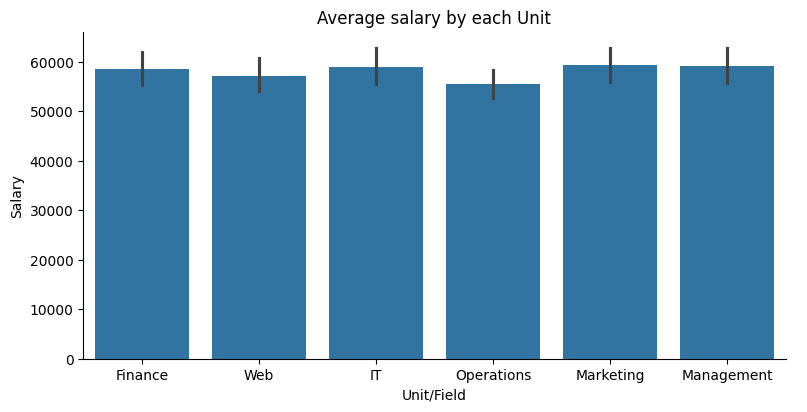

In [27]:
#Categorical plot of Avg Salary by Unit
d1 = data.groupby("UNIT")["SALARY"].mean().sort_values(ascending=False)
print(round(d1,2))
sns.catplot(x="UNIT",y="SALARY" ,kind="bar",data=data, height=4, aspect=2)
plt.title("Average salary by each Unit")
plt.xlabel("Unit/Field")
plt.ylabel("Salary")
plt.show()

SEX
F    59142.73
M    57092.56
Name: SALARY, dtype: float64


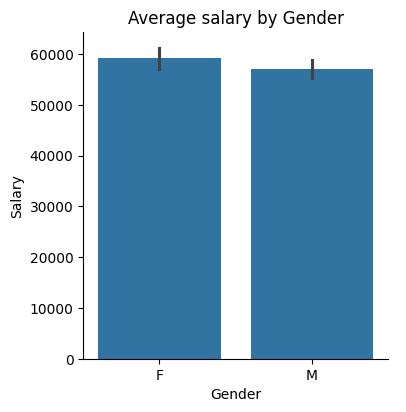

In [28]:
#Categorical plot of Avg Salary by Gender
d1 = data.groupby("SEX")["SALARY"].mean()
print(round(d1,2))
sns.catplot(x="SEX",y="SALARY" ,kind="bar",data=data,height=4)
plt.title("Average salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()

DOJ
1970     89207.00
2009    302197.20
2010    180710.72
2011    121216.51
2012     90680.36
2013     51213.38
2014     51498.71
2015     54147.05
Name: SALARY, dtype: float64


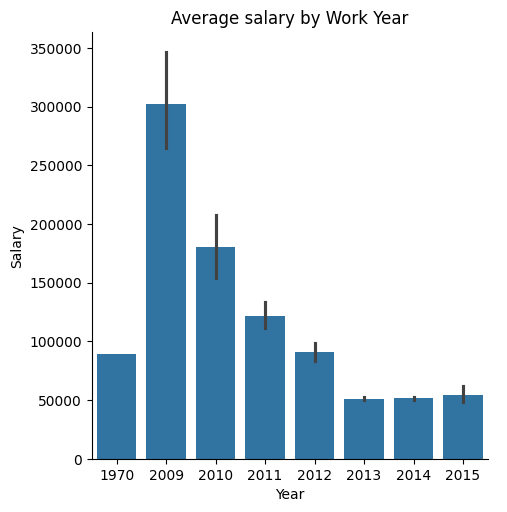

In [29]:
#Categorical plot of Avg Salary by Work year
d1 = data.groupby("DOJ")["SALARY"].mean()
print(round(d1,2))
sns.catplot(x="DOJ",y="SALARY" ,kind="bar",data=data,height=5)
plt.title("Average salary by Work Year")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()

Correlation

In [30]:
data1 = data.drop(columns=['FIRST NAME', 'LAST NAME', 'CURRENT DATE'])
data1.head()

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,1970,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,F,2014,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,2013,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,2014,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


In [31]:
cat_list=[i for i in data1.select_dtypes("object")]
cat_list

['SEX', 'DESIGNATION', 'UNIT']

In [32]:
#Convert categorical values into binary
for i in cat_list:
    data1[i] = data1[i].factorize()[0]
data1

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,2014,0,21.0,44570,0,24.0,6.0,2.0,0
1,0,1970,1,0.0,89207,1,0.0,13.0,0.0,7
2,0,2014,0,21.0,40955,0,23.0,7.0,3.0,0
3,0,2013,0,22.0,45550,2,22.0,8.0,3.0,0
4,1,2014,0,0.0,43161,3,27.0,3.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
2634,0,2011,3,36.0,185977,5,15.0,15.0,5.0,10
2635,0,2014,0,23.0,45758,2,17.0,13.0,2.0,0
2636,0,2014,0,21.0,47315,1,29.0,1.0,5.0,0
2637,0,2014,0,24.0,45172,1,23.0,7.0,3.0,1


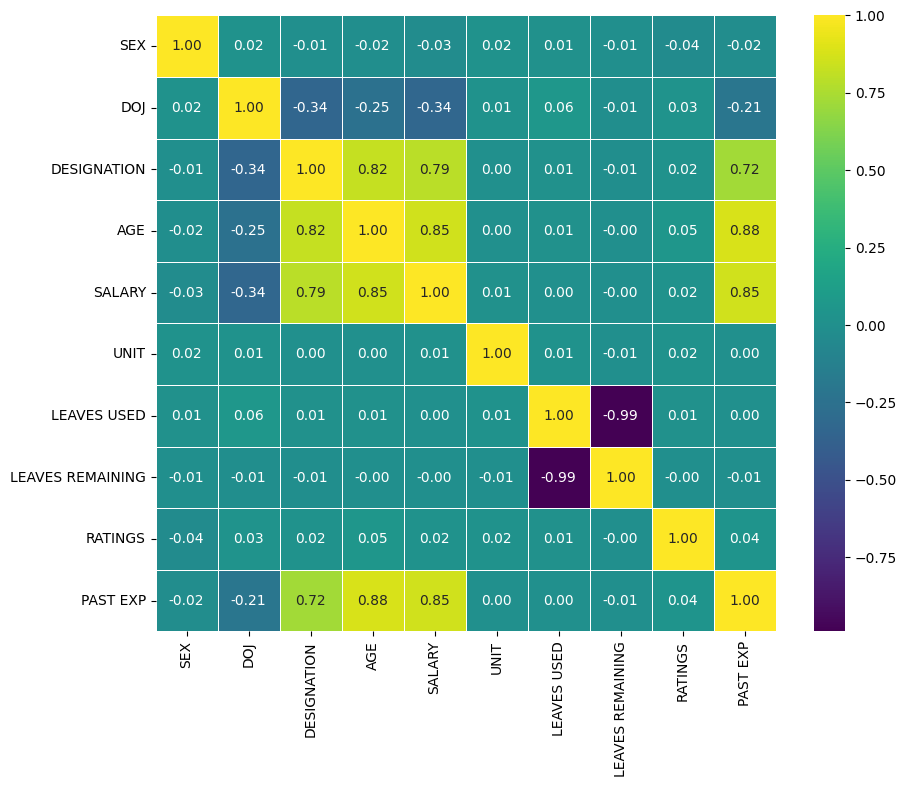

In [33]:
#Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot=True,linewidths=0.7,cmap="viridis",fmt=".2f")
plt.show()

Splitting the Data into Train and Test

In [34]:
X=data1.drop(["SALARY"], axis=1)
Y=data1["SALARY"]

In [35]:
#Import library
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2111, 9)
(528, 9)
(2111,)
(528,)


In [36]:
#Modeling
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [37]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [38]:
y_predict = dt.predict(X_test)
print(dt.score(X_train,Y_train))
print(dt.score(X_test,Y_test))

0.9995951825878004
0.9451333237683751


In [39]:
#Finding R-Square, MSE and MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(r2_score(Y_test, y_predict)*100)
print(mean_squared_error(Y_test, y_predict))
print(mean_absolute_error(Y_test, y_predict))

94.51333237683751
91108142.88357534
5035.708017676768


Performance of Different Models

In [40]:
#To find performances of different models w.r.t training and testing
knn = KNeighborsRegressor().fit(X_train,Y_train)
ada = AdaBoostRegressor().fit(X_train,Y_train)
svm = SVR().fit(X_train,Y_train)
ridge = Ridge().fit(X_train,Y_train)
lasso=Lasso().fit(X_train,Y_train)
rf = RandomForestRegressor().fit(X_train,Y_train)
gbm = GradientBoostingRegressor().fit(X_train,Y_train)
models = [knn,ada,svm,ridge,lasso,rf,gbm]

def ML(Y,models):
    y_pred = models.predict(X_test)
    mse = mean_squared_error(Y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
    r2 = r2_score(Y_test,y_pred)*100

    return mse,rmse,r2
for i in models:
    print("\n",i,"\n\nDifferent Models Success Rate :",ML("SALARY",i))


 KNeighborsRegressor() 

Different Models Success Rate : (159170883.33583334, 12616.294358322231, 90.4144931011833)

 AdaBoostRegressor() 

Different Models Success Rate : (100021518.82775694, 10001.075883511581, 93.97655564472356)

 SVR() 

Different Models Success Rate : (1803235066.176706, 42464.515376684874, -8.593492759324018)

 Ridge() 

Different Models Success Rate : (348074955.61860305, 18656.767019465166, 79.03840942223184)

 Lasso() 

Different Models Success Rate : (348061244.0773986, 18656.399547538604, 79.03923515159926)

 RandomForestRegressor() 

Different Models Success Rate : (99092513.04882838, 9954.522241113753, 94.03250175192818)

 GradientBoostingRegressor() 

Different Models Success Rate : (105810412.80351992, 10286.418852230348, 93.62793985533878)


Here, based on different performance of models, the models can be ranked from best to worst as follows:
Random Forest Regressor(94.35) > GradientBoostingRegressor(93.65) > AdaBoostRegressor(92.76) > KNeighborsRegressor(90.29) > Ridge(79.03) > SVR(-8.59).